<a href="https://colab.research.google.com/github/AFNANAMIN/AI_Freelancing/blob/master/timeseries_anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
data=pd.read_csv('timeseries.csv', names=['num', 'value'])
import numpy as np
data=data[0:400]

SARIMA stands for Seasonal Auto Regressive Integrated Moving Average. It has a seasonal parameter which i initialize as 7 . Other parameters are p,d,q which are identified based on ACF and PACF plots or ideally we should use the parameters with minimal error in forecasting.

More details can be found here: https://people.duke.edu/~rnau/arimrule.htm

In [0]:
actual_vals = data.value.values
actual_log = np.log10(actual_vals)#to make it stationary

In [0]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly as py
#import plotly.tools as tls


In [0]:
train, test = actual_vals[0:-70], actual_vals[-70:]

In [0]:
train_log, test_log = np.log10(train), np.log10(test)

my_order = (1, 1, 1)
my_seasonal_order = (0, 1, 1, 7)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dis

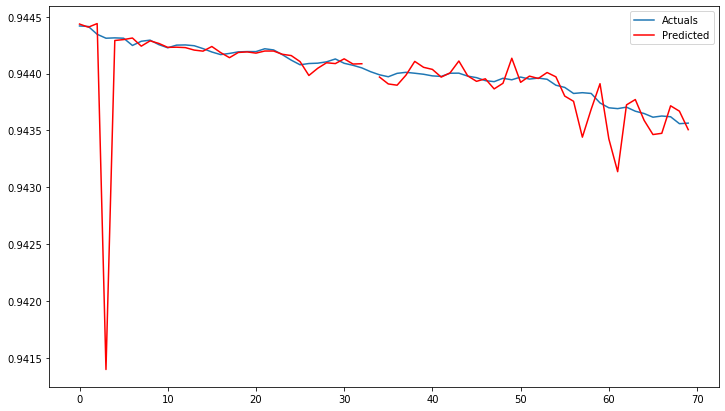

In [0]:
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
   # print('predicted=%f, expected=%f' % (output[0], obs))
#error = math.sqrt(mean_squared_error(test_log, predict_log))
#print('Test rmse: %.3f' % error)
# plot
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [0]:
predictions

[0.9444350743319075,
 0.9444077668869209,
 0.9444393042480602,
 0.9413997086327996,
 0.9442906207848968,
 0.9442987170180381,
 0.9443124740251015,
 0.9442408831208002,
 0.944287592914006,
 0.9442647206255652,
 0.9442303671828781,
 0.9442318046924031,
 0.9442281540616306,
 0.9442064018832201,
 0.9441971126396791,
 0.9442378146327653,
 0.944184309680312,
 0.9441396476860554,
 0.9441855121531,
 0.9441903898651379,
 0.9441796298085207,
 0.9441982098807299,
 0.9441979741459746,
 0.94416935666793,
 0.9441581477772603,
 0.9441050167909303,
 0.9439833096673225,
 0.9440464426832853,
 0.9440949441161144,
 0.9440877882312455,
 0.9441295660875616,
 0.9440838576774223,
 0.9440863901347324,
 nan,
 0.9439696408949212,
 0.9439089232683229,
 0.9438978085092324,
 0.9439857736503279,
 0.9441069811778684,
 0.9440550406247505,
 0.9440366661945022,
 0.9439690758137698,
 0.9440060016956259,
 0.9441103987865871,
 0.9439799430918662,
 0.9439318149361331,
 0.9439540446579516,
 0.9438653576302881,
 0.94391479280

In [0]:
predicted_df=pd.DataFrame()
predicted_df['load_date']=data['num'][-70:]
predicted_df['actuals']=test
predicted_df['predicted']=predictions
predicted_df.reset_index(inplace=True)
del predicted_df['index']
predicted_df.head()

,load_date,actuals,predicted
0,330,0.944418,0.944435
1,331,0.944414,0.944408
2,332,0.944345,0.944439
3,333,0.944311,0.941400
4,334,0.944314,0.944291


In [0]:
import numpy as np
def detect_classify_anomalies(df,window):
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0,inplace=True)
    df['error']=df['actuals']-df['predicted']
    df['percentage_change'] = ((df['actuals'] - df['predicted']) / df['actuals']) * 100
    df['meanval'] = df['error'].rolling(window=window).mean()
    df['deviation'] = df['error'].rolling(window=window).std()
    df['-3s'] = df['meanval'] - (2 * df['deviation'])
    df['3s'] = df['meanval'] + (2 * df['deviation'])
    df['-2s'] = df['meanval'] - (1.75 * df['deviation'])
    df['2s'] = df['meanval'] + (1.75 * df['deviation'])
    df['-1s'] = df['meanval'] - (1.5 * df['deviation'])
    df['1s'] = df['meanval'] + (1.5 * df['deviation'])
    cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'][x])[1][0])(x) for x in
                               range(len(df['error']))]
    severity = {0: 3, 1: 2, 2: 1, 3: 0, 4: 0, 5: 1, 6: 2, 7: 3}
    region = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEGATIVE", 3: "NEGATIVE", 4: "POSITIVE", 5: "POSITIVE", 6: "POSITIVE",
              7: "POSITIVE"}
    df['color'] =  df['impact'].map(severity)
    df['region'] = df['impact'].map(region)
    df['anomaly_points'] = np.where(df['color'] == 3, df['error'], np.nan)
    df = df.sort_values(by='load_date', ascending=False)
    df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y-%m-%d")

    return df

In [0]:
predicted_df

,load_date,actuals,predicted
0,330,0.944418,0.944435
1,331,0.944414,0.944408
2,332,0.944345,0.944439
3,333,0.944311,0.941400
4,334,0.944314,0.944291
...,...,...,...
65,395,0.943617,0.943464
66,396,0.943627,0.943475
67,397,0.943621,0.943717
68,398,0.943560,0.943670


summary:By using a rolling mean and standard deviation here we are able to avoid continuous false anomalies 

# using lstm detect anamolies

In [0]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
data=pd.read_csv('timeseries.csv', names=['num', 'value'])
data=data[0:400]
actual_vals = data.value.values
actual_log = np.log10(actual_vals)#to make it stationary
#actual_log=actual_vals

In [0]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]
#### LSTM
supervised = timeseries_to_supervised(actual_log, 1)
supervised_values = supervised.values

# split data into train and test-sets
train_lstm, test_lstm = supervised_values[0:-70], supervised_values[-70:]

# transform the scale of the data
scaler, train_scaled_lstm, test_scaled_lstm = scale(train_lstm, test_lstm)

In [0]:
lstm_model = fit_lstm(train_scaled_lstm, 1, 850 , 3)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled_lstm[:, 0].reshape(len(train_scaled_lstm), 1, 1)
#lstm_model.predict(train_reshaped, batch_size=1)

In [0]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly as py
import plotly.tools as tls

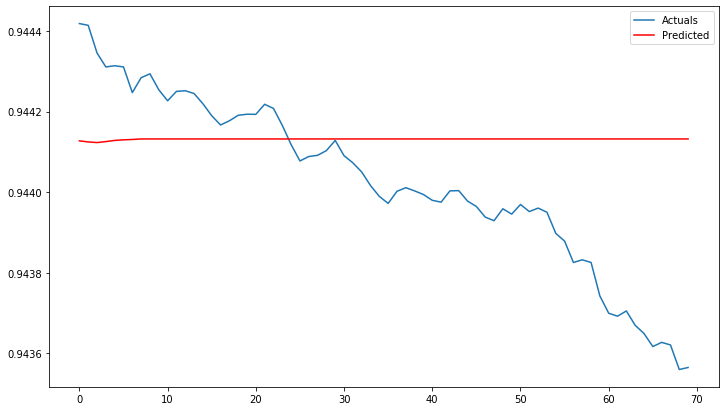

In [0]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled_lstm)):
#make one-step forecast
    X, y = test_scaled_lstm[i, 0:-1], test_scaled_lstm[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    #yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(10**yhat)
    expected = actual_log[len(train_lstm) + i ]
# line plot of observed vs predicted
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(actual_vals[-70:],label='Actuals')
pyplot.plot(predictions, color = "red",label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

here the lstm is not able to detect   anamolies wery well and further classification trees is for supervised learning so they can not be able to detect anamolies  in this scenario

In [0]:
!pip install stldecompose
from stldecompose import decompose, forecast
import pandas as pd
#data=pd.read_csv('timeseries.csv')
data=pd.read_csv('timeseries.csv', names=['num', 'value'])
temp = data.reset_index()
df_stl_month = temp[['num', 'value']].set_index('num')
decomp = decompose(df_stl_month.values, period=12)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

In [0]:
trend

array([0.94313618, 0.94313609, 0.943136  , ..., 0.94291431, 0.94291427,
       0.94291423])

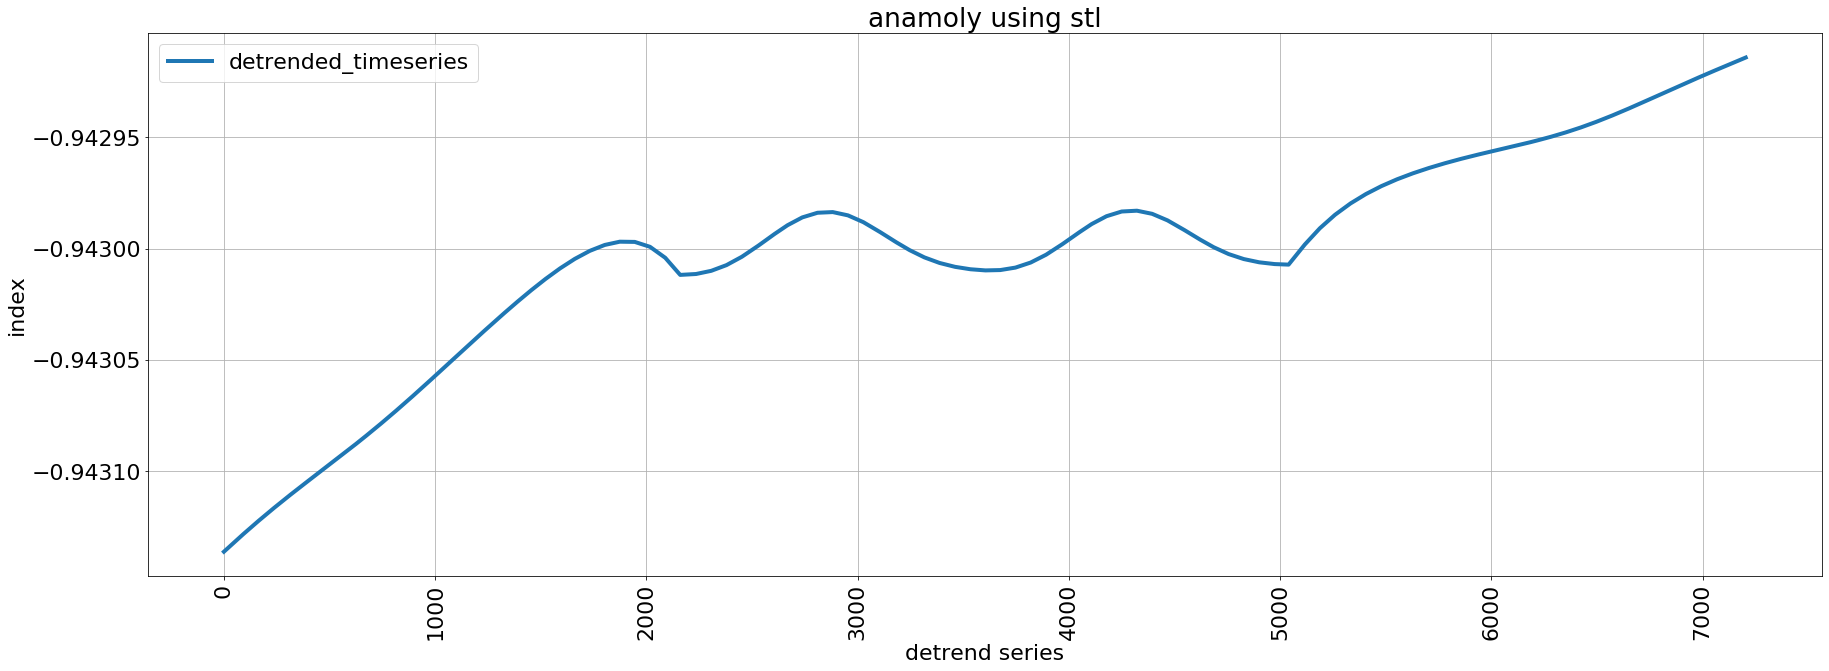

In [0]:
import matplotlib.pyplot as plt

data['detrended_series'] = data.value-(data.value+trend)

plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
plt.grid()
plt.plot(data.index, data.detrended_series, marker='', linestyle='-', label='detrended_timeseries', linewidth=4)
#plt.plot(data.index, data.value, marker='', linestyle='-', label='detrended_timeseries', linewidth=4)

plt.title("anamoly using stl")
plt.xlabel("detrend series")
plt.ylabel("index")
plt.xticks(rotation=90)
plt.legend()
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 7204
Model:                 ARIMA(5, 1, 0)   Log Likelihood               63075.114
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 04 Dec 2019   AIC                        -126136.228
Time:                        08:03:26   BIC                        -126088.051
Sample:                             1   HQIC                       -126119.651
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.109e-08    4.8e-07     -0.169      0.866   -1.02e-06    8.59e-07
ar.L1.D.value     0.0188      0.012      1.596      0.110      -0.004       0.042
ar.L2.D.value    -0.0637      0.012     

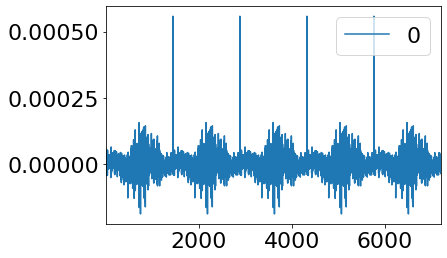

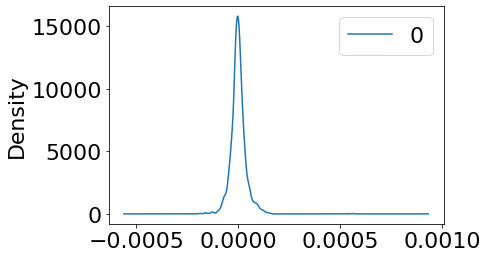

                  0
count  7.204000e+03
mean   3.113506e-09
std    3.813271e-05
min   -1.876018e-04
25%   -1.797388e-05
50%   -1.275602e-06
75%    1.602444e-05
max    5.580739e-04


In [0]:

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 

# fit model
model = ARIMA(data.value, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

model = ExponentialSmoothing(np.asarray(train['data']), trend='mul', seasonal=None)
#model2 = ExponentialSmoothing(np.asarray(train['data']), trend='mul', seasonal=None, damped=True)
model._index = pd.to_datetime(train.index)

fit1 = model.fit()
fit2 = model2.fit()
pred1 = fit1.forecast(9)
pred2 = fit2.forecast(10)

fig, ax = plt.subplots(2, figsize=(12, 12))
ax[0].plot(train.index[250:], train.values[250:])
ax[0].plot(test.index, test.values, color="gray", label="truth")
ax[1].plot(train.index[300:], train.values[300:])
ax[1].plot(test.index, test.values, color="gray", label="truth")
for p, f, c in zip((pred1, pred2),(fit1, fit2),('#ff7823','#3c763d')):
    ax[0].plot(train.index[250:], f.fittedvalues[250:], color=c)
    ax[1].plot(train.index[300:], f.fittedvalues[300:], color=c)
    ax[0].plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4]+ ", damping="+str(True if f.params['damping_slope']>0 else False), color=c)
    ax[1].plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4]+ ", damping="+str(True if f.params['damping_slope']>0 else False), color=c)
ax[0].set_title("Damped Exponential Smoothing");
ax[1].set_title("Damped Exponential Smoothing - zoomed");
plt.legend();

arima and stl,lstm not achieve far more accurate results then sarimax